# PyTorch workflow
https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build a model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"    ,
}

In [2]:
import torch
from torch import nn #* nn contains all of PyTorch's neural network building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.0.0+cu117'

## Data (preparing and loading)

Data can be almost anything... in machine learing
* Excel sheet
* Images
* Videos
* Audio
* DNA
* Text
* etc...

Machine learing is a game of two parts:
1. Get data into a numerical representaion.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using linear regression.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and validation/test sets

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [5]:
print(X_train[:10], y_train[:10])
print(X_test[:10], y_test[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


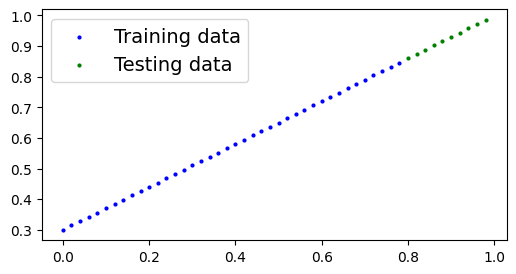

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(6, 3))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})
    plt.show()

plot_predictions()

What our model does:
* Start with random weights and bias
* Look at training data and adjust the random values to better represent (or get closer to)
the ideal values (the weight & bias values we used to create the data)

How does it do so?
1. Gradient descent
2. Backpropagation


In [7]:
## 2. Building our model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float32,
                                                requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float32,
                                            requires_grad=True))
    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias  # <- this is the linear regression formula (y = m*x + b)
           

### PyTorch model builing essentials
| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  | 
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. | 
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). | 
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

### Checking the contents of our PyTorch model
We can check our model parameters or see what's inside using `.parameters()`

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `touch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through outr model it's gonna arun it through the `forward()` method.

In [10]:
# Make predictions with model
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

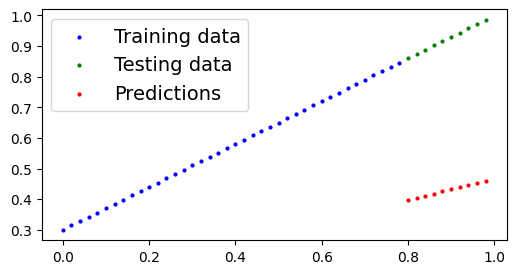

In [11]:
plot_predictions(predictions=y_pred)

## 3. Training a model

One way to measure how wrong your models predixctions are to use aloss function.

* Note: Loss functions may also be called cost function or criterion in different areas.

### Things we need to train:

* **Loss function:** A function that measures how wrong the model's predictions are compared to the ideal values.
https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer:** Takes into account the losss of a model and adjust the model's parameters (e.g. weights and bias) to improve the loss function.
https://pytorch.org/docs/stable/optim.html
  *  Inside the optimzer you'll oftenhave toi set wwo parameters:
     *  `param`: The model parameters to optimize, for example `model_0.parameters()`
     *  `lr` (learning rate): The rate at which the optimizer will update the model parameters, a higher learning rate will cause the model to learn faster but may also cause the model to learn less accurately.

And specifically for PyTorch we need:
* A training loop
* A testing loop



In [12]:
# Checkout our model's parameters (a parameter is a value that the mdoel sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
# Setup a loss function 
loss_fn = nn.L1Loss()

# Setup and optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)
    # lr = learning rate = possibly rhe most important hyperparameter you can set
#1e-1

In [14]:
loss_fn

L1Loss()

# Building a training  (and a testing) loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do...
1. Forward pass (this involves moving data through our model's `forward()` method) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels) 
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to improve the loss (**gradient descent**)

In [15]:
torch.manual_seed(42)
# An epoch is a full pass through the training data
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

#? Training
#* 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    # train mode in PyTorchg sets all parameters that require gradients to require gradient
    model_0.train()

    #* 1. Forward pass
    y_pred = model_0(X_train)
    
    #* 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    #print(f'Loss: {loss}')
    #* 3. Optimizer zero grad
    optimizer.zero_grad()

    #* 4. Performe backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    #* 5. Step the optimizer (perform gradient descent)
    optimizer.step() 
    # by default how the optimizer changes will accumulate through the loop
    # soo we have to zero them above in step 3  for the next iteration of the loop

    model_0.eval() # Turns off different settings in the mdoel not needed for evaluation/testing (dropout/batchnorm)

    with torch.inference_mode(): # Turns off gradient tracking & a couple more things behind the scenes
    # with torch.no_grad(): OLD WAY    
        #* 1. Forward pass
        test_pred = model_0(X_test)

        #* 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 50 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


print(model_0.state_dict())

Epoch: 0 | Train loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 50 | Train loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 100 | Train loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 150 | Train loss: 0.0072835334576666355 | Test loss: 0.016474086791276932
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


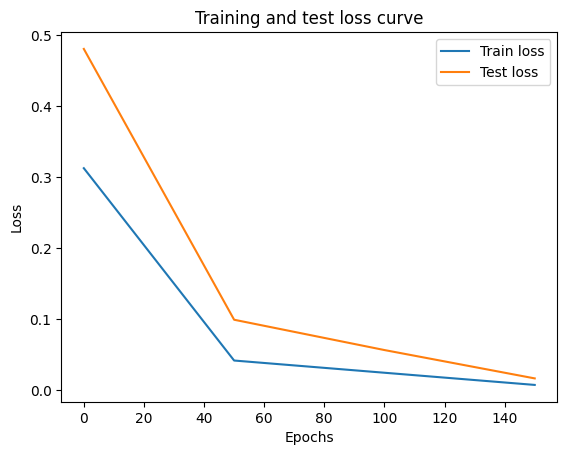

In [16]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

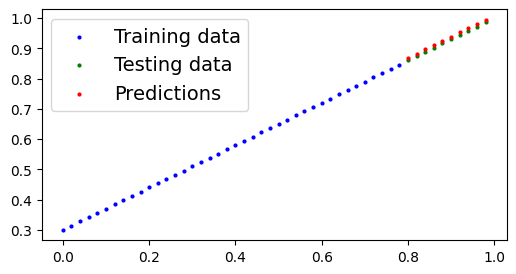

In [17]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

### Saving model in PyTorch

There are three main methods you should know about about for saving for saving and loading models in pYTorch.

1. `torch.save()` - Allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` - Allows you to load a saved PyTorch object from a file.
3. `torch.nn.Module.load_state_dict()` - Allows you to load a model's saved state dictionary.

In [18]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("../models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: ../models/01_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model

Since we saved our model's `state_dict()`, we'll create a new instance of our model class and load the saved `state_dict()` into it.

In [19]:
# To load in as saved state_dict we have to instantiate a new isntance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the asaved state  dict of model_0 (this will update jnew isntance with update paramters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [20]:
# Compare loaded model preds with original model preds
model_0.eval()
with torch.inference_mode():
    y_preds = loaded_model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [21]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [22]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together
Let's go baclk through the steps above and see it all in one place.


In [23]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

torch.__version__


'2.0.0+cu117'

In [24]:
# Create device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6.1 Data

In [25]:
# Create  some data using linear regresion formula y = weight * X + bias
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]], device='cuda:0'),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]], device='cuda:0'))

In [26]:
# Split data
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

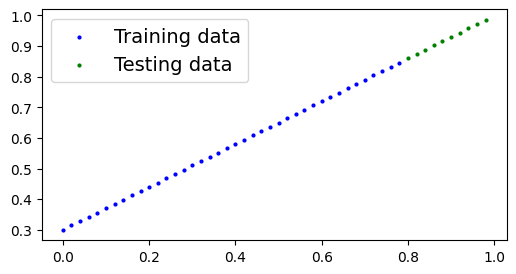

In [27]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu())

## 6.2 Building pytorch linear model


In [28]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters /
        # also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1,
                                        out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2().to(device)    
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]))

### 6.3 Training the model

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [29]:
# Setup a loss function
loss_fn = nn.L1Loss()
# Setup an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [30]:
# Training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()
    # 1. Forward pass
    y_pred = model_1(X_train)
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    # 3. Zero the gradients
    optimizer.zero_grad()
    # 4. Backpropagation
    loss.backward()
    # 5. Step the optimizer
    optimizer.step()

    ## Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Train loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Train loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Train loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Train loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018

In [31]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [32]:
# Turn model into eval mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

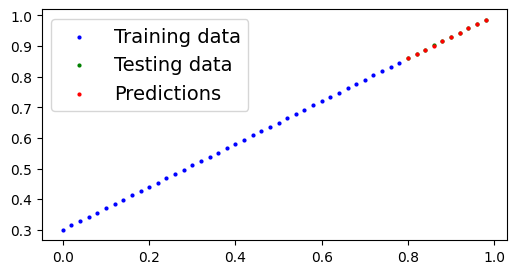

In [33]:
# Check out our model predictions
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_preds.cpu())

### 6.5 Saving and loading a model

In [34]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("../models")  
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


In [35]:
# Load in the saved model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [37]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')